In [ ]:
# Imports
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import tree
from sklearn.metrics import mean_squared_error, mean_absolute_error
from sklearn.metrics import accuracy_score

In [ ]:
# Connect to Google Drive
from google.colab import drive
drive.mount('/content/drive')

Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [ ]:
# Read the csv file for Pre-processed Data
df = pd.read_csv('/content/drive/MyDrive/DWDM Data/RealEstatePreprocessed.csv')
df

,Unnamed: 0,Url,Title,Type,Price,Price_Value,Currency,Location,Province,City,Baths,Beds,Area,Area_in_sqft,Purpose,Date_Added,Month,Year,Description
0,0,https://www.zameen.com//Property/islamabad_tar...,10 Kanal Empty Land Available For Rent,Commercial Plot,4 Lakh,400000,PKR,"Tarnol, Islamabad, Islamabad Capital",Islamabad Capital,Islamabad,0,0,10 Kanal,54450.0000,For Rent,2022-12-25,12,2022,10 kanal empty land available for rent in Isla...
1,1,https://www.zameen.com//Property/islamabad_gt_...,Fair-priced 27000 Square Feet Commercial Plot ...,Commercial Plot,15 Lakh,1500000,PKR,"GT Road, Islamabad, Islamabad Capital",Islamabad Capital,Islamabad,0,0,6 Kanal,32670.0000,For Rent,2022-12-14,12,2022,6 Kanal Land On main GT Road For Rent Ideal Pl...
2,2,https://www.zameen.com//Property/islamabad_isl...,20 Kanal Land On Main Isb Highway Available Fo...,Commercial Plot,20 Lakh,2000000,PKR,"Islamabad Expressway, Islamabad, Islamabad Cap...",Islamabad Capital,Islamabad,0,0,20 Kanal,108900.0000,For Rent,2022-12-14,12,2022,20 Kanal Land on Main ISB Highway Available Fo...
3,3,https://www.zameen.com//Property/islamabad_g_1...,Industrial Building Available For Rent,Industrial Land,55 Thousand,55000,PKR,"G-12, Islamabad, Islamabad Capital",Islamabad Capital,Islamabad,0,0,1 Kanal,5445.0000,For Rent,2022-12-26,12,2022,A Industrial Plot Located In G12 Just 1km Away...
4,4,https://www.zameen.com//Property/islamabad_mir...,Industrial Building Available For Rent,Industrial Land,50 Thousand,50000,PKR,"Mira Abadi, Islamabad, Islamabad Capital",Islamabad Capital,Islamabad,0,0,1 Kanal,5445.0000,For Rent,2022-12-26,12,2022,A Single Story Building In Which One Hall Plus...
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
275877,280040,https://www.zameen.com//Property/balochistan_z...,Commercial Plot On National Highway Quetta Roa...,Commercial Plot,PKR3.4 Crore,34000000,PKR,"Zhob, Balochistan",Balochistan,Zhob,0,0,19.1 Marla,5199.9941,For Sale,2016-12-29,12,2016,Commercial Plot On National Highway Quetta Roa...
275878,280041,https://www.zameen.com//Property/balochistan_z...,Residential Plot For Sale,Residential Plot,PKR50 Lakh,5000000,PKR,"Zhob, Balochistan",Balochistan,Zhob,0,0,4.4 Marla,1197.9044,For Sale,2016-12-29,12,2016,Zhob bypassIdeal locationNear to Pak China Eco...
275879,280042,https://www.zameen.com//Property/balochistan_z...,Residential Plot For Sale,Residential Plot,PKR50 Lakh,5000000,PKR,"Zhob, Balochistan",Balochistan,Zhob,0,0,4.4 Marla,1197.9044,For Sale,2016-12-29,12,2016,Zhob bypassIdeal locationNear to Pak China Eco...
275880,280043,https://www.zameen.com//Property/balochistan_z...,Residential Plot For Sale,Residential Plot,PKR50 Lakh,5000000,PKR,"Zhob, Balochistan",Balochistan,Zhob,0,0,4.4 Marla,1197.9044,For Sale,2016-12-29,12,2016,Zhob bypassIdeal locationNear to Pak China Eco...


In [ ]:
# Set the Data types of the DataFrame columns
df = df.astype({
    'Url': str,
    'Title': str, 
    'Type': str, 
    'Price': str, 
    'Price_Value': int,
    'Currency': str, 
    'Location': str,
    'Province': str,
    'City': str, 
    'Baths': int, 
    'Beds': int,
    'Area': str, 
    'Area_in_sqft': float,
    'Purpose': str,
    'Date_Added': str,
    'Month': int,
    'Year': int,
    'Description': str
})

In [ ]:
# Function to encode categories in a dataset
def encode_categories(encoder, dataset, category):
  dataset[category] = encoder.fit_transform(dataset[category])
  return encoder

# Create a copy of the dataframe
dataframe = df.copy()

# Encode the type, location, province, city and purpose columns in a dataset
encoder = LabelEncoder()
encode_categories(encoder, dataframe, "Type")
encode_categories(encoder, dataframe, "Location")
encode_categories(encoder, dataframe, "Province")
encode_categories(encoder, dataframe, "City")
encode_categories(encoder, dataframe, "Purpose")
dataframe.head()

,Unnamed: 0,Url,Title,Type,Price,Price_Value,Currency,Location,Province,City,Baths,Beds,Area,Area_in_sqft,Purpose,Date_Added,Month,Year,Description
0,0,https://www.zameen.com//Property/islamabad_tar...,10 Kanal Empty Land Available For Rent,2,4 Lakh,400000,PKR,3722,3,62,0,0,10 Kanal,54450.0,0,2022-12-25,12,2022,10 kanal empty land available for rent in Isla...
1,1,https://www.zameen.com//Property/islamabad_gt_...,Fair-priced 27000 Square Feet Commercial Plot ...,2,15 Lakh,1500000,PKR,1109,3,62,0,0,6 Kanal,32670.0,0,2022-12-14,12,2022,6 Kanal Land On main GT Road For Rent Ideal Pl...
2,2,https://www.zameen.com//Property/islamabad_isl...,20 Kanal Land On Main Isb Highway Available Fo...,2,20 Lakh,2000000,PKR,1597,3,62,0,0,20 Kanal,108900.0,0,2022-12-14,12,2022,20 Kanal Land on Main ISB Highway Available Fo...
3,3,https://www.zameen.com//Property/islamabad_g_1...,Industrial Building Available For Rent,7,55 Thousand,55000,PKR,1081,3,62,0,0,1 Kanal,5445.0,0,2022-12-26,12,2022,A Industrial Plot Located In G12 Just 1km Away...
4,4,https://www.zameen.com//Property/islamabad_mir...,Industrial Building Available For Rent,7,50 Thousand,50000,PKR,2313,3,62,0,0,1 Kanal,5445.0,0,2022-12-26,12,2022,A Single Story Building In Which One Hall Plus...


In [ ]:
# Split the dataset into train and test data
train_set_x,test_set_x,train_set_y,test_set_y=train_test_split(dataframe[['Type', 'Location', 'Province', 'City', 'Baths', 'Beds', 'Area_in_sqft', 'Purpose', 'Year']],dataframe['Price_Value'],test_size=0.3,shuffle=True)

# Print the shape of the obtained dataframes
print("X_train: ", train_set_x.shape)
print("X_test: ", test_set_x.shape)
print("y_train: ", train_set_y.shape)
print("y_test: ", test_set_y.shape)

X_train:  (193117, 9)
X_test:  (82765, 9)
y_train:  (193117,)
y_test:  (82765,)


In [ ]:
# Save the train and test sets as csv files
# train_set_x.to_csv("/content/drive/MyDrive/DWDM Data/train_x.csv", index = False)
# test_set_x.to_csv("/content/drive/MyDrive/DWDM Data/test_x.csv", index = False)
# train_set_y.to_csv("/content/drive/MyDrive/DWDM Data/train_y.csv", index = False)
# test_set_y.to_csv("/content/drive/MyDrive/DWDM Data/test_y.csv", index = False)

In [ ]:
# Load the train and test sets
train_set_x = pd.read_csv("/content/drive/MyDrive/DWDM Data/train_x.csv")
test_set_x = pd.read_csv("/content/drive/MyDrive/DWDM Data/test_x.csv")
train_set_y = pd.read_csv("/content/drive/MyDrive/DWDM Data/train_y.csv")
test_set_y = pd.read_csv("/content/drive/MyDrive/DWDM Data/test_y.csv")

In [ ]:
# Classify using Decision Tree Regressor with the criterion = squared_error
clf = tree.DecisionTreeRegressor(criterion = "squared_error")
clf = clf.fit(train_set_x, train_set_y)
y_predict = clf.predict(test_set_x)
clf.score(test_set_x, test_set_y)

0.7221435952957402

In [ ]:
# Print the Actual and Predicted Data
print("Actual Data:")
print(test_set_y)
print("\nPredictive Values:")
print(y_predict)

# Print the accuracy score of the model
print("\nAccuracy Score:", clf.score(test_set_x, test_set_y))

Actual Data:
       Price_Value
0        117500000
1           130000
2          5700000
3         33500000
4          5000000
...            ...
82760        65000
82761        85000
82762     11500000
82763      5000000
82764      1700000

[82765 rows x 1 columns]

Predictive Values:
[1.21496748e+08 7.56046512e+04 6.95852941e+06 ... 1.13529412e+07
 5.00000000e+06 1.60000000e+06]

Accuracy Score: 0.7221435952957402


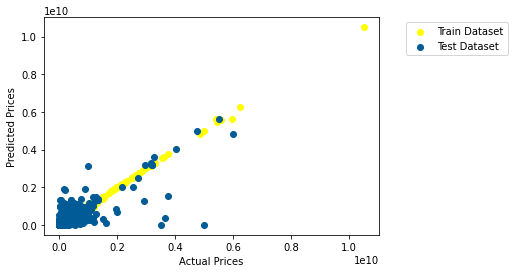

In [ ]:
# Plot the Actual Prices against the Predicted Prices
plt.scatter(train_set_y,clf.predict(train_set_x), color = 'yellow')
plt.scatter(test_set_y, clf.predict(test_set_x), color = "#005b96")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(['Train Dataset', 'Test Dataset'], bbox_to_anchor=(1.4, 1), loc = 'upper right')
plt.show()

In [ ]:
# Classify using Decision Tree Classifier with the criterion = friedman_mse
clf = tree.DecisionTreeRegressor(criterion="friedman_mse")
clf = clf.fit(train_set_x, train_set_y)
y_predict = clf.predict(test_set_x)

In [ ]:
# Print the Actual and Predicted Data
print("Actual Data:")
print(test_set_y)
print("\nPredictive Values:")
print(y_predict)

# Print the accuracy score of the model
print("\nAccuracy Score:", clf.score(test_set_x, test_set_y))

Actual Data:
       Price_Value
0        117500000
1           130000
2          5700000
3         33500000
4          5000000
...            ...
82760        65000
82761        85000
82762     11500000
82763      5000000
82764      1700000

[82765 rows x 1 columns]

Predictive Values:
[1.21496748e+08 7.56046512e+04 6.95852941e+06 ... 1.13529412e+07
 5.00000000e+06 1.60000000e+06]

Accuracy Score: 0.7038083545086138


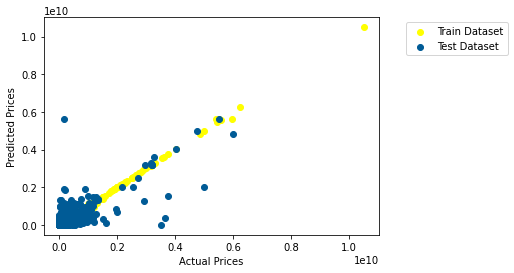

In [ ]:
# Plot the Actual Prices against the Predicted Prices
plt.scatter(train_set_y,clf.predict(train_set_x), color = 'yellow')
plt.scatter(test_set_y, clf.predict(test_set_x), color = "#005b96")
plt.xlabel('Actual Prices')
plt.ylabel('Predicted Prices')
plt.legend(['Train Dataset', 'Test Dataset'], bbox_to_anchor=(1.4, 1), loc = 'upper right')
plt.show()